# Dataton Aiffel
* Group : EagleAI
* Dataset : 영화관 입장권 통합 전산망
* Name : 김용훈(Kim yonghun)

## Contents

1. Import libraries & load dataset
2. Data EDA
3. Data preprocessing
4. Visualization of first idea

## 1. Import libraries & load dataset

* if want to show korean on matplotlib, command annotation lines on termianl 
* set kor font in matplotlib using 'rc' function (나눔 고딕)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

* load dataset
* show dataset shape and head

In [3]:
data = pd.read_csv('KOBIS.csv')
print(data.shape)
data.head()

# dfi.export(data.head(), 'graph/kyh_d_1.png')

(26197, 18)


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


## 2. Data EDA (Original Data)

중점적으로 볼 columns 
* Movie_Name 
* Relase_Date
* Nationality
* National_Sales
* National_Audience
* Rating

(26197, 18)
(18,)
(6,)


/tmp/ipykernel_8633/4144871228.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_show.index, fontsize= 5)


<AxesSubplot:>

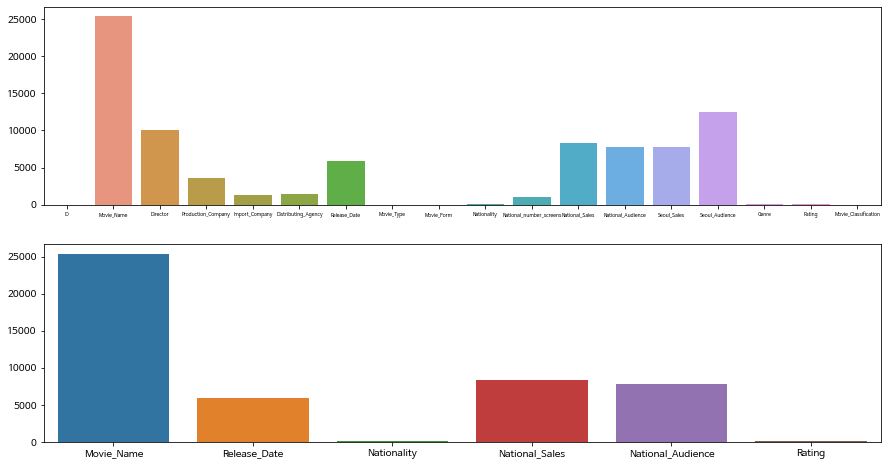

In [4]:
col_use = ['Movie_Name', 'Release_Date', 'Nationality', 'National_Sales', 'National_Audience', 'Rating']
data_show = data.describe(include='all').loc['unique']
data_show_use = data.describe(include='all').loc['unique', col_use]
print(data.shape)
print(data_show.shape)
print(data_show_use.shape)

fig, (ax1, ax2) = plt.subplots(2,figsize=(15, 8))
ax1.set_xticklabels(data_show.index, fontsize= 5)
sns.barplot(x = data_show.index , y = data_show.values, ax = ax1)
sns.barplot(x = data_show_use.index , y = data_show_use.values, ax = ax2)

# dfi.export(data[col_use].head(), 'graph/kyh_d_2_colum_explain.png')

## 2. Data EDA (null)

* Check how many rows have null values.
* Visualization counts of null values in rows

Counts of rows having null values : 25179
Counts of rows having null values over 4 : 238


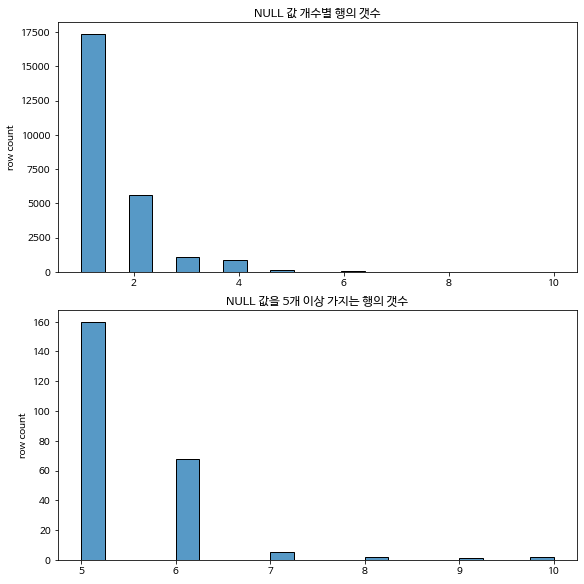

In [4]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 0 ]
print("Counts of rows having null values :", len(data_null))
data_null2 = data_null[data_null.values > 4]
print("Counts of rows having null values over 4 :", len(data_null2))

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize = (8,8))
ax[0].set_title("NULL 값 개수별 행의 갯수")
sns.histplot(x=data_null.values, ax = ax[0], bins=20)
ax[0].set_ylabel('row count')
ax[1].set_title("NULL 값을 5개 이상 가지는 행의 갯수")
sns.histplot(x=data_null2.values, ax = ax[1], bins=20)
ax[1].set_ylabel('row count')

plt.show()

* Check which columns have null values.

In [5]:
data_null = data.isnull().any()
data_null = data_null[data_null.values == True]
data_null_col = data_null.index
data_null_col

Index(['Director', 'Production_Company', 'Import_Company',
       'Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality',
       'National_Sales', 'Seoul_Sales', 'Genre', 'Rating'],
      dtype='object')

* Visualization how many columns have null values

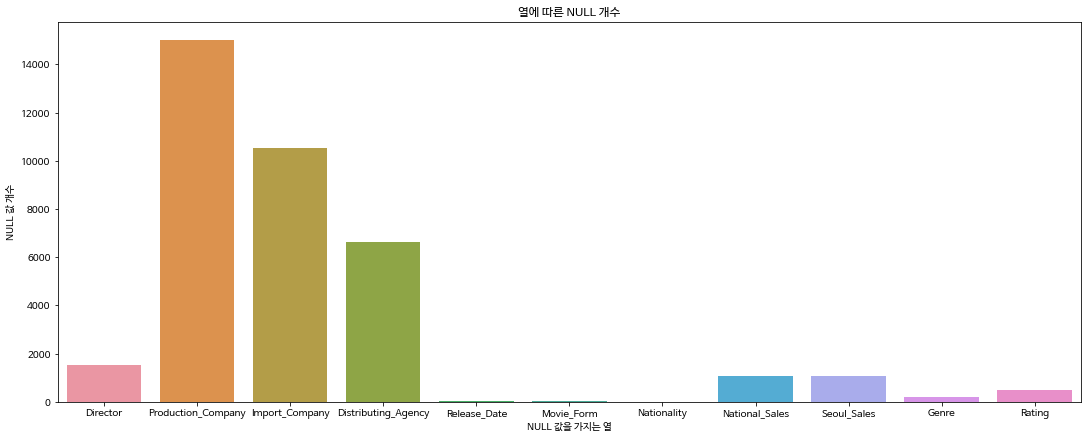

In [6]:
data_null = data.isnull().sum(axis = 0)
data_null = data_null[data_null_col]
# data_null.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(constrained_layout=True, figsize = (15,6))
sns.barplot(x=data_null.index, y=data_null.values)
ax.set_title("열에 따른 NULL 개수")
ax.set_xlabel("NULL 값을 가지는 열")
ax.set_ylabel("NULL 값 개수")

plt.show()

## 3. Data preprocessing null

1. Divides by what column datatype
   - numeric no null :  
      1. 'ID'  
      2. 'National_number_screens'    
      3. 'National_Audience'  
      4. 'Seoul_Audience'  
   - numeric have null :  
      1. 'National_Sales'  
      2. 'Seoul_Sales'  
   - datetime :  
      * Release_date  
   - string have null :  
      1. 'Director'  
      2. 'Production_Company'  
      3. 'Import_Company'  
      4. 'Distributing_Agency'  
      5. 'Moive_Form'  
      6. 'Nationality'  
      7. 'Genre'  
      8. 'Rating'
    - string no null :  
      1. 'Movie_Name'
      2. 'Movie_Type'
      3. 'Movie_Classification'
2. Data preprocessing numeric columns
3. Data preprocessing string columns

* Delete rows having over 5 null values(78 count)

In [7]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 5]
print('Count :', len(data_null))
data = data.drop(data_null.index)

Count : 78


Fill null value with '-1' in numeric_columns

In [8]:
num_columns_null = ['National_Sales','Seoul_Sales']
data[num_columns_null] = data[num_columns_null].fillna('-1')
data[num_columns_null].isna().sum()

National_Sales    0
Seoul_Sales       0
dtype: int64

Change num_columns value type to float

In [9]:
num_columns = ['National_number_screens', 'National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('float')

Fill null values with 'No_column_name' in  
['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Genre']

In [10]:
# string_columns = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality', 'Genre', 'Rating']
string_columns1 = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Movie_Form', 'Genre']
data[string_columns1].isnull().sum()

Director                1499
Production_Company     15002
Import_Company         10477
Distributing_Agency     6573
Movie_Form                 8
Genre                    121
dtype: int64

In [11]:
for i in string_columns1:
    data[i] = data[i].fillna('No_'+ i)
# data.head()
# data[string_columns1].isnull().sum()

Search and fill Nationality column null values

In [12]:
data[data['Nationality'].isnull()]
dfi.export(data[data['Nationality'].isnull()], 'graph/kyh_d_3.png')

[0728/172710.533834:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172710.549535:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172710.690397:INFO:headless_shell.cc(660)] Written to file /tmp/tmpce0xzotp/temp.png.
[0728/172710.809595:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172710.820296:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172710.987339:INFO:headless_shell.cc(660)] Written to file /tmp/tmp4ywc67pj/temp.png.
[0728/172711.126897:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172711.140451:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172711.339786:INFO:headless_shell.cc(660)] Written to file /tmp/tmpcj64erc0/temp.png.


* 오! 브라더스 : 한국  
* 필사의 탈출 : 미국  
* 신촉산 : 홍콩  
* 우리는그들을잊으려한다 : 유고슬라비아  
We have to see that values in columns

In [13]:
Nationality_columns = ['한국','미국','홍콩','유고슬라비아']
for i in Nationality_columns:
    print(i in set(data['Nationality']))

True
True
True
True


All values also in column  
so, add values in each rows

In [14]:
data.loc[251 , 'Nationality' ] = '한국'
data.loc[3805 , 'Nationality' ] = '미국'
data.loc[6802 , 'Nationality' ] = '홍콩'
data.loc[23940 , 'Nationality' ] = '유고슬라비아'
data.loc[[251, 3805, 6802, 23940]]
dfi.export(data.loc[[251, 3805, 6802, 23940]], 'graph/kyh_d_4.png')

[0728/172711.664665:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172711.675639:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172711.827219:INFO:headless_shell.cc(660)] Written to file /tmp/tmpwh4lx9gh/temp.png.
[0728/172711.954105:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172711.965644:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172712.136064:INFO:headless_shell.cc(660)] Written to file /tmp/tmpm5gnrhfh/temp.png.
[0728/172712.275643:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172712.290376:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172712.490246:INFO:headless_shell.cc(660)] Written to file /tmp/tmp4i27rno3/temp.png.


Rating and Release Date have null values

For preprocessing Rating column, we make new csv file match score

In [15]:
df_Rating = pd.read_csv('Rating.csv')
print(df_Rating.shape)
print(set(df_Rating['score']))
df_Rating.head()

dfi.export(df_Rating.head(), 'graph/kyh_d_5.png')

(55, 2)
{'12', 'ETC', '15', 'ALL', 'X', '18'}


[0728/172712.774146:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172712.786503:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172712.906710:INFO:headless_shell.cc(660)] Written to file /tmp/tmpw4fvoc_z/temp.png.


Replace 'Rating' column values using new csv file 'Rating' 
fill 'Rating' null value to 'ETC'

In [16]:
for i in range(len(df_Rating)):
    data.replace(df_Rating['Rating'][i], df_Rating['score'][i], inplace = True)
    # print(df_Rating['Rating'][i], df_Rating['score'][i])

# data['Rating']
data['Rating'].fillna('ETC', inplace = True)
data['Rating']
set(data['Rating'])

dfi.export(data.head(), 'graph/kyh_d_6.png')



[0728/172713.581212:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172713.600010:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172713.745785:INFO:headless_shell.cc(660)] Written to file /tmp/tmpoeai_q9s/temp.png.
[0728/172713.863370:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172713.895572:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172714.081625:INFO:headless_shell.cc(660)] Written to file /tmp/tmp9edw50wo/temp.png.
[0728/172714.219715:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172714.230646:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172714.450981:INFO:headless_shell.cc(660)] Written to file /tmp/tmp5mr69z0l/temp.png.


'Release Date' value change to datetime

In [17]:
# Convert Release_Date to datetime value
import datetime

data['Release_Date'] = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")

data['Release_Date'].dt.year
data['year'] = data['Release_Date'].dt.year

data['Release_Date'].dt.month
data['month'] = data['Release_Date'].dt.month

data['Release_Date'].dt.day
data['day'] = data['Release_Date'].dt.day

data['year'] = data['year'].fillna(0)
data['year'].isna().sum()

data['month'] = data['month'].fillna(0)
data['month'].isna().sum()

data['day'] = data['day'].fillna(0)
data['day'].isna().sum()

data.head()
dfi.export(data.head(), 'graph/kyh_d_7.png')

[0728/172714.743700:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172714.753791:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172714.893532:INFO:headless_shell.cc(660)] Written to file /tmp/tmpavs1zxoo/temp.png.
[0728/172715.013793:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172715.024942:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172715.205973:INFO:headless_shell.cc(660)] Written to file /tmp/tmpmaq85ehl/temp.png.
[0728/172715.345875:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0728/172715.357951:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0728/172715.562856:INFO:headless_shell.cc(660)] Written to file /tmp/tmpls743b0g/temp.png.


Null value 출력

In [18]:
data_null = data.isnull().sum(axis = 0)
data_null

ID                          0
Movie_Name                  0
Director                    0
Production_Company          0
Import_Company              0
Distributing_Agency         0
Release_Date               18
Movie_Type                  0
Movie_Form                  0
Nationality                 0
National_number_screens     0
National_Sales              0
National_Audience           0
Seoul_Sales                 0
Seoul_Audience              0
Genre                       0
Rating                      0
Movie_Classification        0
year                        0
month                       0
day                         0
dtype: int64

/home/aiffel/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


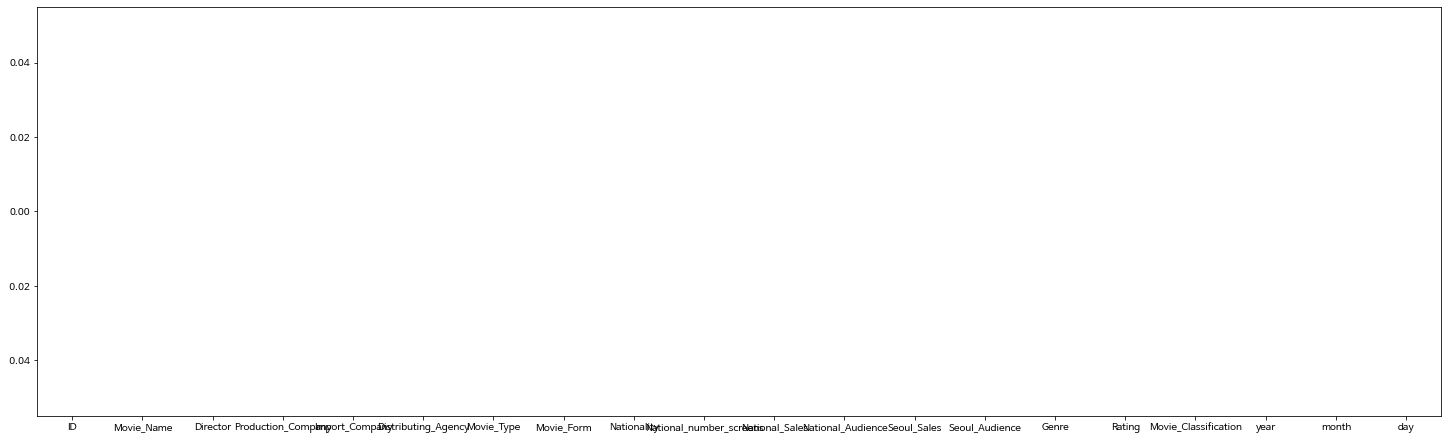

In [19]:
data_null.drop('Release_Date', inplace = True)
fig, ax = plt.subplots(constrained_layout=True, figsize = (20,6))
sns.barplot(x=data_null.index, y=data_null.values)
plt.show()

## 3. Data preprocessing outline

### Check 0, -1 values in numeric columns

In [20]:
data.sort_values('National_Sales').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
4228,4229,어머니 왜 나를 낳으셨나요,김묵,신창필름,No_Import_Company,No_Distributing_Agency,1972-06-03,개봉영화,장편,한국,...,-1.0,0.0,-1.0,51491.0,No_Genre,ALL,일반영화,1972.0,6.0,3.0
2257,2258,스웜,어윈 알렌,워너 브러더스 픽쳐스,세경흥업(주),No_Distributing_Agency,1979-03-31,개봉영화,장편,미국,...,-1.0,0.0,-1.0,142062.0,공포(호러),ETC,일반영화,1979.0,3.0,31.0
6912,6913,일요일의 손님들,김수용,세경흥업(주),No_Import_Company,No_Distributing_Agency,1973-10-20,개봉영화,장편,한국,...,-1.0,0.0,-1.0,15704.0,멜로/로맨스,12,일반영화,1973.0,10.0,20.0
10812,10813,이조 상노비사,최인현,대영영화주식회사,No_Import_Company,No_Distributing_Agency,1975-01-25,개봉영화,장편,한국,...,-1.0,0.0,-1.0,3210.0,사극,15,일반영화,1975.0,1.0,25.0
4620,4621,고교 꺼꾸리군 장다리군,석래명,삼영필림,No_Import_Company,No_Distributing_Agency,1977-06-14,개봉영화,장편,한국,...,-1.0,0.0,-1.0,42779.0,드라마,12,일반영화,1977.0,6.0,14.0


show how many 0 values in columns

In [21]:
data.sort_values('Seoul_Audience').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
26196,26197,av감독의 아내,쿠도 마사노리,No_Production_Company,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-22,개봉영화,장편,일본,...,8000.0,1.0,0.0,0.0,성인물(에로),18,일반영화,2016.0,12.0,22.0
21748,21749,변태작가의 색스런 이야기,No_Director,No_Production_Company,주식회사 미콘,주식회사 미콘,2020-02-07,개봉영화,장편,일본,...,1000.0,1.0,0.0,0.0,드라마,18,일반영화,2020.0,2.0,7.0
21749,21750,변태정력왕 : 투명인간의탄생,오쿠 와타루,No_Production_Company,(주)에스와이미디어,(주)에스와이미디어,2017-05-15,개봉영화,장편,일본,...,5000.0,1.0,0.0,0.0,ETC,18,일반영화,2017.0,5.0,15.0
21750,21751,변태커플 스와핑,나카메구로 코우지,No_Production_Company,(주)플라이어,(주)플라이어,2016-06-03,개봉영화,장편,일본,...,8000.0,1.0,0.0,0.0,드라마,18,일반영화,2016.0,6.0,3.0
21751,21752,변했다! 내 남자의 맛,제너럴리스트,(주)뮤직엔닷컴,No_Import_Company,(주)뮤직엔닷컴,2022-05-31,개봉영화,장편,한국,...,100000.0,20.0,0.0,0.0,성인물(에로),18,일반영화,2022.0,5.0,31.0


In [22]:
data.sort_values('Seoul_Sales').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
13122,13123,흑야,이두용,합동영화(주),No_Import_Company,No_Distributing_Agency,1975-12-13,개봉영화,장편,한국,...,-1.0,0.0,-1.0,1089.0,드라마,12,일반영화,1975.0,12.0,13.0
1417,1418,속 써스페리아,다리오 아르젠토,No_Production_Company,연방영화(주),No_Distributing_Agency,1978-12-24,개봉영화,장편,이탈리아,...,-1.0,0.0,-1.0,241806.0,공포(호러),18,일반영화,1978.0,12.0,24.0
4000,4001,무림대협,김선경,동아흥행㈜,No_Import_Company,No_Distributing_Agency,1979-06-23,개봉영화,장편,한국,...,-1.0,0.0,-1.0,57333.0,액션,12,일반영화,1979.0,6.0,23.0
6281,6282,무림 악인전,김정용,한진흥업주식회사,No_Import_Company,No_Distributing_Agency,1980-04-10,개봉영화,장편,한국,...,-1.0,0.0,-1.0,20342.0,사극,ALL,일반영화,1980.0,4.0,10.0
4008,4009,마음 약해서,심우섭,태창흥업,No_Import_Company,No_Distributing_Agency,1980-01-12,개봉영화,장편,한국,...,-1.0,0.0,-1.0,57089.0,코미디,12,일반영화,1980.0,1.0,12.0


In [23]:
from collections import Counter

num_columns = ['National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']

print(data.shape)

test = []
columns_0_count  = pd.DataFrame()
columns_0_count['column_name'] = num_columns

print("0 values")
for i in num_columns:
    print(i, ':' ,Counter(data[i])[0])
    test.append(Counter(data[i])[0])

print("-1 values(null)")
for i in num_columns:
    print(i, ':' ,Counter(data[i])[-1])
    
columns_0_count['count'] = test

(26119, 21)
0 values
National_Audience : 7308
National_Sales : 7866
Seoul_Audience : 6654
Seoul_Sales : 14392
-1 values(null)
National_Audience : 0
National_Sales : 983
Seoul_Audience : 0
Seoul_Sales : 989


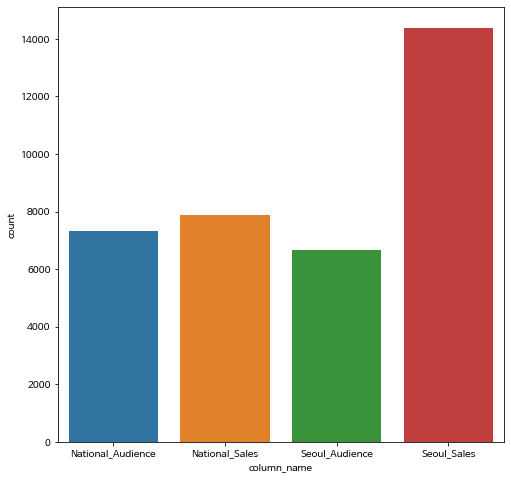

In [24]:
columns_0_count
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=columns_0_count['column_name'], y=columns_0_count['count'])
plt.show()


해당 열의 0 값이 2가지 의미를 가지고 있습니다.  
실제로 0인지와 통계를 받지못해서 0인 경우가 있습니다.  
해당 기준의 부재로 0을 다른 값으로 채우는 것은 힘들 것 같습니다.

In [25]:
data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
0,1,명량,김한민,(주)빅스톤픽쳐스,No_Import_Company,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,...,1.357484e+11,17613682.0,3.312123e+10,4163666.0,사극,15,일반영화,2014.0,7.0,30.0
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,...,1.284471e+11,13624328.0,4.054752e+10,3993374.0,SF,12,독립/예술영화,2009.0,12.0,17.0
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",No_Import_Company,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,...,0.000000e+00,12302831.0,0.000000e+00,3660842.0,드라마,15,일반영화,2005.0,12.0,29.0
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",No_Import_Company,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,...,1.396480e+11,16264944.0,3.185866e+10,3638287.0,코미디,15,일반영화,2019.0,1.0,23.0
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",No_Production_Company,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,...,1.221827e+11,13934592.0,3.357714e+10,3597963.0,액션,12,일반영화,2019.0,4.0,24.0


meta-data를 찾아보니  
한국영화연감(1971~2010) 통계를 기준으로 정리한 것이며,  
2011년부터는 통합전산망을 기준으로 일정한 주기(매월, 매년)로 마감 처리하여 산출되는 통계정보입니다. 라 되어있으니  
제대로 된 Data는 2011부터 입니다.

In [26]:
data_new = data[data['year'] > 2010]
data_new.shape
data_new

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
0,1,명량,김한민,(주)빅스톤픽쳐스,No_Import_Company,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,...,1.357484e+11,17613682.0,3.312123e+10,4163666.0,사극,15,일반영화,2014.0,7.0,30.0
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",No_Import_Company,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,...,1.396480e+11,16264944.0,3.185866e+10,3638287.0,코미디,15,일반영화,2019.0,1.0,23.0
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",No_Production_Company,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,...,1.221827e+11,13934592.0,3.357714e+10,3597963.0,액션,12,일반영화,2019.0,4.0,24.0
7,8,도둑들,최동훈,(주)케이퍼필름,No_Import_Company,(주)쇼박스,2012-07-25,개봉영화,장편,한국,...,9.366557e+10,12983330.0,2.608943e+10,3468906.0,액션,15,일반영화,2012.0,7.0,25.0
8,9,알라딘,가이 리치,No_Production_Company,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-05-23,개봉영화,장편,미국,...,1.069836e+11,12555894.0,3.021891e+10,3377404.0,어드벤처,ALL,일반영화,2019.0,5.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,26193,T-34,알렉세이 시도로프,No_Production_Company,㈜코리아스크린,㈜코리아스크린,2019-06-27,개봉영화,장편,러시아,...,5.000000e+03,1.0,0.000000e+00,0.0,전쟁,12,독립/예술영화,2019.0,6.0,27.0
26193,26194,V/H/S/2: 악마를 부르는 비디오,"가렛 에반스,아담 윈가드,에두아르도 산체스,그렉 헤일",No_Production_Company,(주)노이에스,(주)노이에스,2013-08-14,개봉영화,장편,미국,...,3.000000e+05,75.0,0.000000e+00,0.0,공포(호러),18,일반영화,2013.0,8.0,14.0
26194,26195,VIP전용 여자,카네다 사토시,No_Production_Company,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-01,개봉영화,장편,일본,...,8.000000e+03,1.0,0.000000e+00,0.0,성인물(에로),18,일반영화,2016.0,12.0,1.0
26195,26196,VJ의 은밀한 사생활,오카다 히로,No_Production_Company,(주)영진크리에이티브,(주)영진크리에이티브,2017-12-25,개봉영화,장편,일본,...,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,18,일반영화,2017.0,12.0,25.0


0 values
National_Audience : 3
National_Sales : 3
Seoul_Audience : 6536
Seoul_Sales : 6530
-1 values(null)
National_Audience : 0
National_Sales : 0
Seoul_Audience : 0
Seoul_Sales : 6


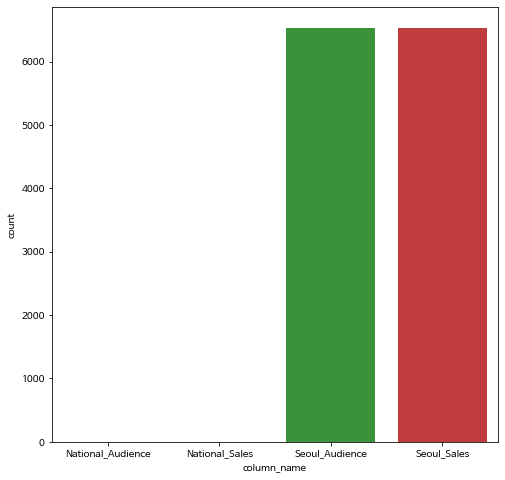

In [27]:
num_columns = ['National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']

test = []
columns_0_count  = pd.DataFrame()
columns_0_count['column_name'] = num_columns

print("0 values")
for i in num_columns:
    print(i, ':' ,Counter(data_new[i])[0])
    test.append(Counter(data_new[i])[0])

print("-1 values(null)")
for i in num_columns:
    print(i, ':' ,Counter(data_new[i])[-1])
    
columns_0_count['count'] = test

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=columns_0_count['column_name'], y=columns_0_count['count'])
plt.show()

/home/aiffel/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


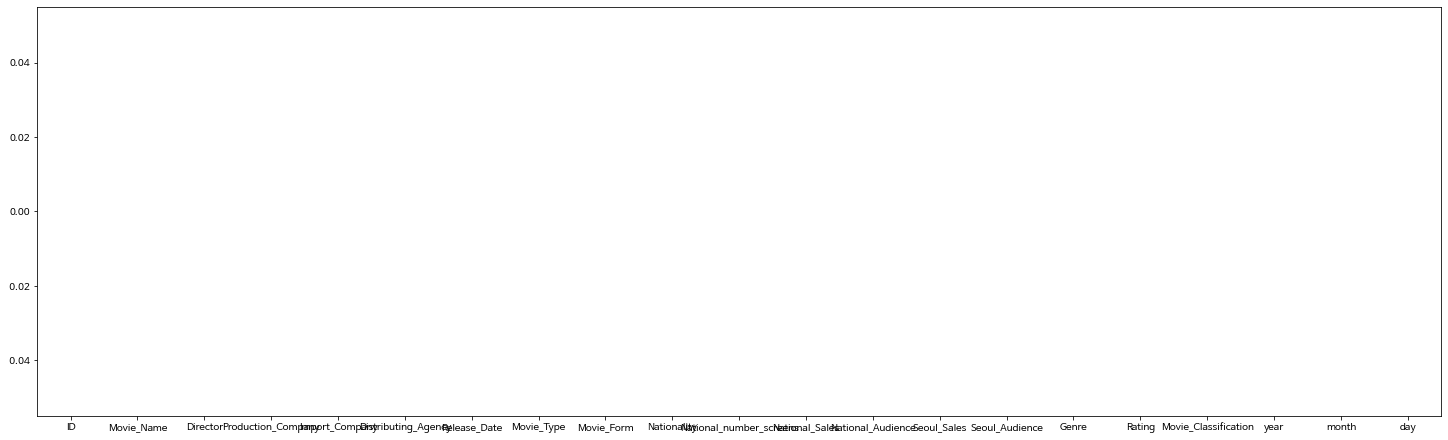

In [28]:
data_null = data_new.isnull().sum(axis = 0)
data_null
fig, ax = plt.subplots(constrained_layout=True, figsize = (20,6))
sns.barplot(x=data_null.index, y=data_null.values)
plt.show()

### Graph

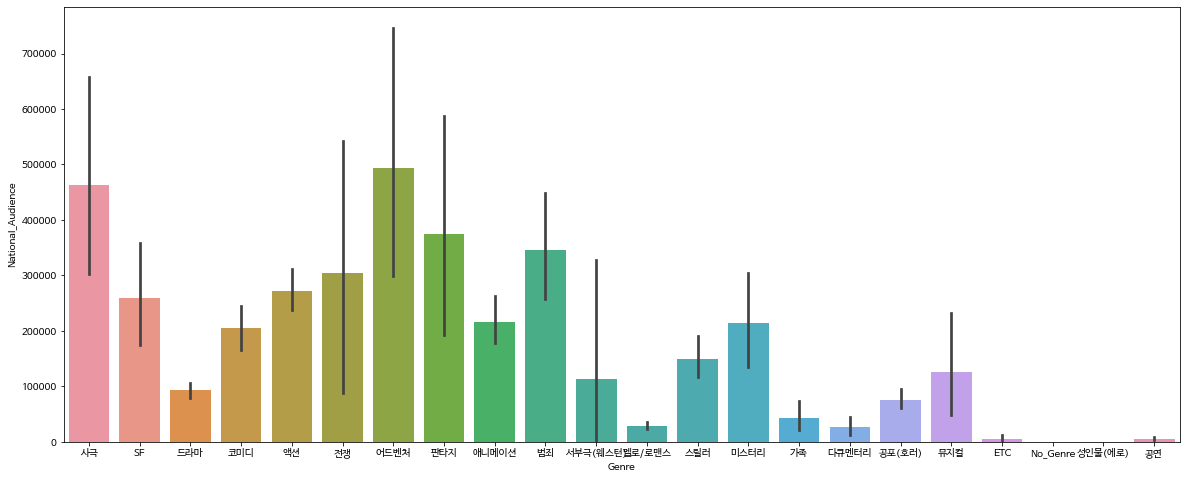

In [29]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=data['Genre'], y=data['National_Audience'])
plt.show()

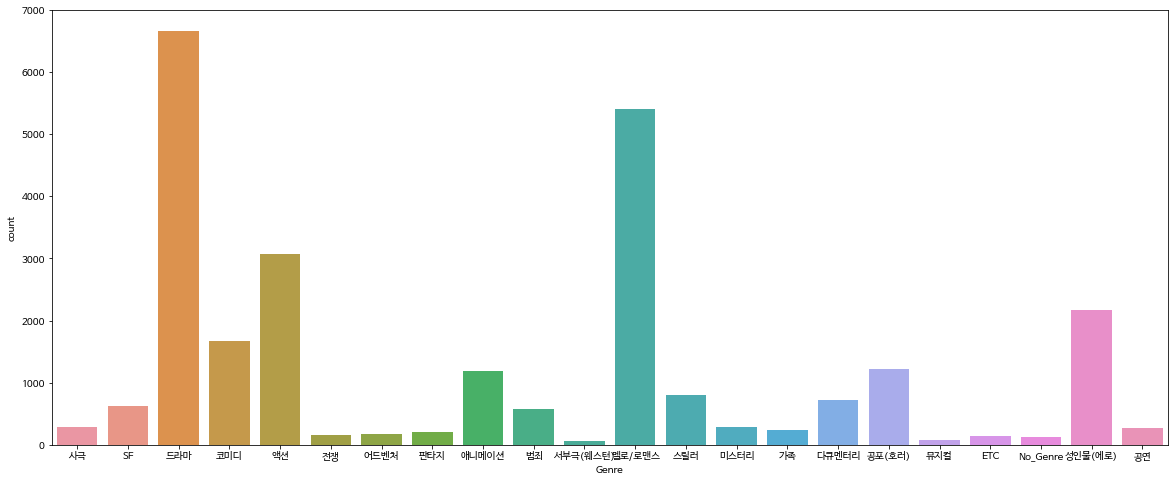

In [30]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x=data['Genre'])
plt.show()

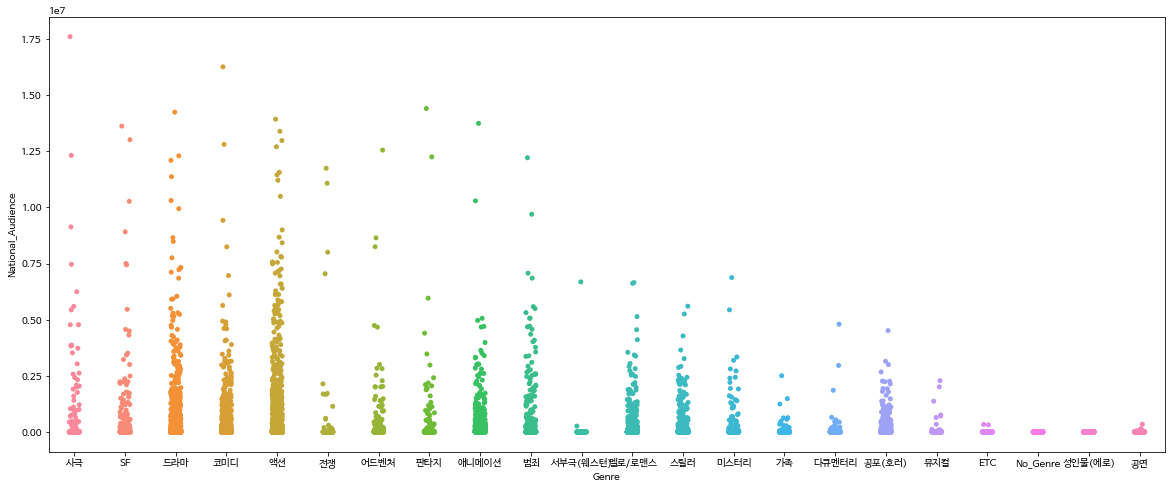

In [31]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.stripplot(x=data['Genre'], y=data['National_Audience'])
plt.show()